In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import LabelEncoder

In [12]:
df = pd.read_csv('salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [13]:
print(df.to_string())

       company                  job     degree  salary_more_then_100k
0       google      sales executive  bachelors                      0
1       google      sales executive    masters                      0
2       google     business manager  bachelors                      1
3       google     business manager    masters                      1
4       google  computer programmer  bachelors                      0
5       google  computer programmer    masters                      1
6   abc pharma      sales executive    masters                      0
7   abc pharma  computer programmer  bachelors                      0
8   abc pharma     business manager  bachelors                      0
9   abc pharma     business manager    masters                      1
10    facebook      sales executive  bachelors                      1
11    facebook      sales executive    masters                      1
12    facebook     business manager  bachelors                      1
13    facebook     b

In [15]:
df.isnull().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

In [16]:
LB = LabelEncoder()
df['company'] = LB.fit_transform(df['company'])
df['job'] = LB.fit_transform(df['job'])
df['degree'] = LB.fit_transform(df['degree'])

In [17]:
df.corr()

,company,job,degree,salary_more_then_100k
company,1.000000e+00,0.108941,-1.777780e-17,0.124035
job,1.089410e-01,1.000000,7.559289e-02,-0.370842
degree,-1.777780e-17,0.075593,1.000000e+00,0.258199
salary_more_then_100k,1.240347e-01,-0.370842,2.581989e-01,1.000000


In [18]:
X = df.drop(columns =['salary_more_then_100k'])
Y = df['salary_more_then_100k']

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

In [27]:
model_log = LogisticRegression()
model_linear = LinearRegression()

In [28]:
model_log.fit(X_train,Y_train)

LogisticRegression()

In [29]:
model_linear.fit(X_train,Y_train)

LinearRegression()

In [30]:
model_log.predict(X_test)

array([1, 1, 1, 1], dtype=int64)

In [31]:
model_linear.predict(X_test)

array([0.55577689, 0.39840637, 0.7559761 , 0.79880478])

In [32]:
model_log.score(X_train,Y_train)

0.8333333333333334

In [33]:
model_linear.score(X_train,Y_train)

0.3098716246126604

<AxesSubplot:xlabel='Company', ylabel='Salary_more_then_100k'>

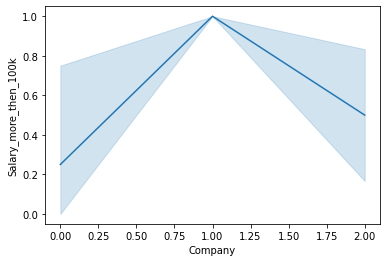

In [34]:
from matplotlib import pyplot as plt
result1 = pd.DataFrame(columns = ['company','salary_more_then_100k'])
result1['Company'] = df['company']
result1['Salary_more_then_100k'] = df['salary_more_then_100k']
sns.lineplot(x='Company',y='Salary_more_then_100k',data=result1.head(25))